#Importing libraries and dataset

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
purchase_data = pd.read_csv("purchase_behaviour.csv")
transaction_data = pd.read_csv("transaction_data.csv")
purchase_data.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [5]:
transaction_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


#EDA

In [7]:
# Exploratory Data Analysis
# Display basic info and summary statistics
print("Purchase Data Info:")
purchase_data.info()

Purchase Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [8]:
print("\nTransaction Data Info:")
transaction_data.info()


Transaction Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


In [9]:
print("\nPurchase Data Summary:")
purchase_data.describe(include='all')


Purchase Data Summary:


,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
count,7.263700e+04,72637,72637
unique,NaN,7,3
top,NaN,RETIREES,Mainstream
freq,NaN,14805,29245
mean,1.361859e+05,NaN,NaN
std,8.989293e+04,NaN,NaN
min,1.000000e+03,NaN,NaN
25%,6.620200e+04,NaN,NaN
50%,1.340400e+05,NaN,NaN
75%,2.033750e+05,NaN,NaN


In [10]:
print("\nTransaction Data Summary:")
transaction_data.describe()


Transaction Data Summary:


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836.000000,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,43464.036260,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
std,105.389282,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226
min,43282.000000,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,43373.000000,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,43464.000000,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,43555.000000,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,43646.000000,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


In [11]:
# Check for missing values
print("\nMissing Values in Purchase Data:")
purchase_data.isnull().sum()


Missing Values in Purchase Data:


,0
LYLTY_CARD_NBR,0
LIFESTAGE,0
PREMIUM_CUSTOMER,0


In [12]:
print("\nMissing Values in Transaction Data:")
transaction_data.isnull().sum()


Missing Values in Transaction Data:


,0
DATE,0
STORE_NBR,0
LYLTY_CARD_NBR,0
TXN_ID,0
PROD_NBR,0
PROD_NAME,0
PROD_QTY,0
TOT_SALES,0


#Top 3 Most Profitable Products:


In [14]:
# Top 3 Most Profitable Products
top_products = (
    transaction_data.groupby(["PROD_NBR", "PROD_NAME"])["TOT_SALES"]
    .sum()
    .reset_index()
    .sort_values(by="TOT_SALES", ascending=False)
    .head(3)
)
top_products

,PROD_NBR,PROD_NAME,TOT_SALES
3,4,Dorito Corn Chp Supreme 380g,40352.0
13,14,Smiths Crnkle Chip Orgnl Big Bag 380g,36367.6
15,16,Smiths Crinkle Chips Salt & Vinegar 330g,34804.2


1. Dorito Corn Chips Supreme 380g - \$40,352
2. Smiths Crinkle Chip Original Big Bag 380g - \$36,367.6
3. Smiths Crinkle Chips Salt & Vinegar 330g - \$34,804.2

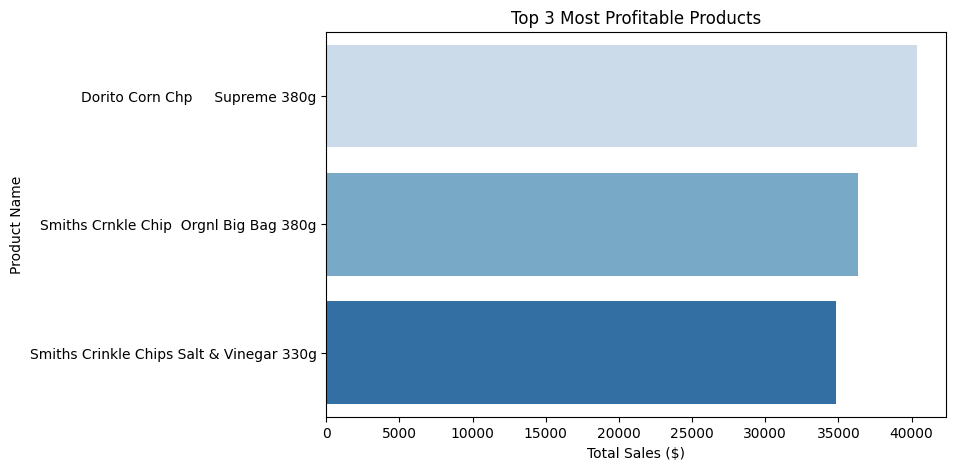

In [32]:
# Visualization: Top 3 Products
plt.figure(figsize=(8, 5))
sns.barplot(x=top_products["TOT_SALES"], y=top_products["PROD_NAME"], hue=top_products["PROD_NAME"], palette="Blues", legend=False)
plt.xlabel("Total Sales ($)")
plt.ylabel("Product Name")
plt.title("Top 3 Most Profitable Products")
plt.show()

#Most Loyal Customers:


In [27]:
# Loyal Customers Analysis
loyal_customers = (
    transaction_data.groupby("LYLTY_CARD_NBR")["TXN_ID"]
    .count()
    .reset_index()
    .rename(columns={"TXN_ID": "PURCHASE_COUNT"})
    .sort_values(by="PURCHASE_COUNT", ascending=False)
)
loyal_customers

,LYLTY_CARD_NBR,PURCHASE_COUNT
42813,162039,18
45905,172032,18
3686,13138,17
31654,116181,17
34943,128178,17
...,...,...
38194,143033,1
38190,143029,1
38188,143027,1
38187,143026,1


In [28]:
loyal_customers = loyal_customers.merge(purchase_data, on="LYLTY_CARD_NBR")

In [29]:
# Customer Segmentation Analysis
loyal_customer_segments = loyal_customers.head(100)["LIFESTAGE"].value_counts()
loyal_customer_types = loyal_customers.head(100)["PREMIUM_CUSTOMER"].value_counts()

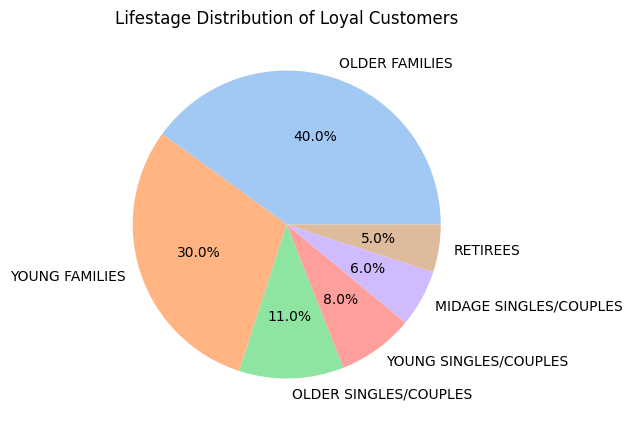

In [30]:
# Visualization: Customer Lifestage Distribution
plt.figure(figsize=(7, 5))
loyal_customer_segments.plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette("pastel"))
plt.ylabel('')
plt.title("Lifestage Distribution of Loyal Customers")
plt.show()

##Lifestage Distribution:

1. Older Families (40%)
2. Young Families (30%)
3. Older Singles/Couples (11%)

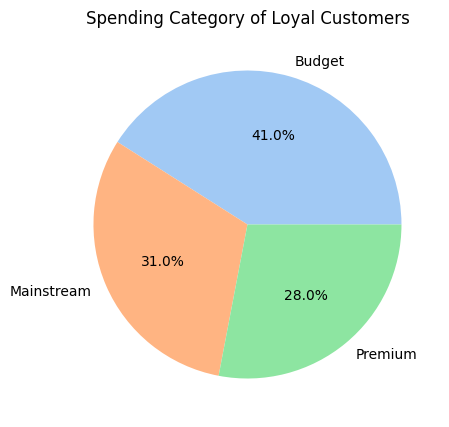

In [31]:
# Visualization: Customer Type Distribution
plt.figure(figsize=(7, 5))
loyal_customer_types.plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette("pastel"))
plt.ylabel('')
plt.title("Spending Category of Loyal Customers")
plt.show()



##Spending Category:

1. Budget Shoppers (41%)
2. Mainstream (31%)
3. Premium (28%)



#Hypothesis: Why Do They Remain Loyal?

**Pricing Strategy:**

As majority of the loyal customers are from the budget category, the pricing strategy used by the market is well-optimized for value-seeking shoppers.

**Convenience:**

A significant portion of loyal customers are families,whether they may be older or younger families. They may favor convenience—easy access, quick checkout, and reliable product availability.

**High Quality:**

A significant amount of loyal customers fall into the "premium customer" category, they might be drawn to high-quality products, exclusive deals, or personalized promotions.

